In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [2]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    plt.figure(figsize=figsize)
    plt.barh(np.arange(len(bars_length)),
             bars_length,
             label=labels,
             color='#72BCDB')
    plt.yticks(np.arange(len(bars_length)),
               yticks_labels,
               size=30)
    plt.xticks(size=30)
    bars_lengths = lambda i: bars_length[i] if bars_length[i] > 0 else 0
    for i, label in enumerate(labels):    
        bars = bars_lengths(i)
        plt.text(bars,
                 i,
                 str(label),
                 color='black',
                 size=30,
                 verticalalignment='center')
    plt.grid(True)
    plt.show()

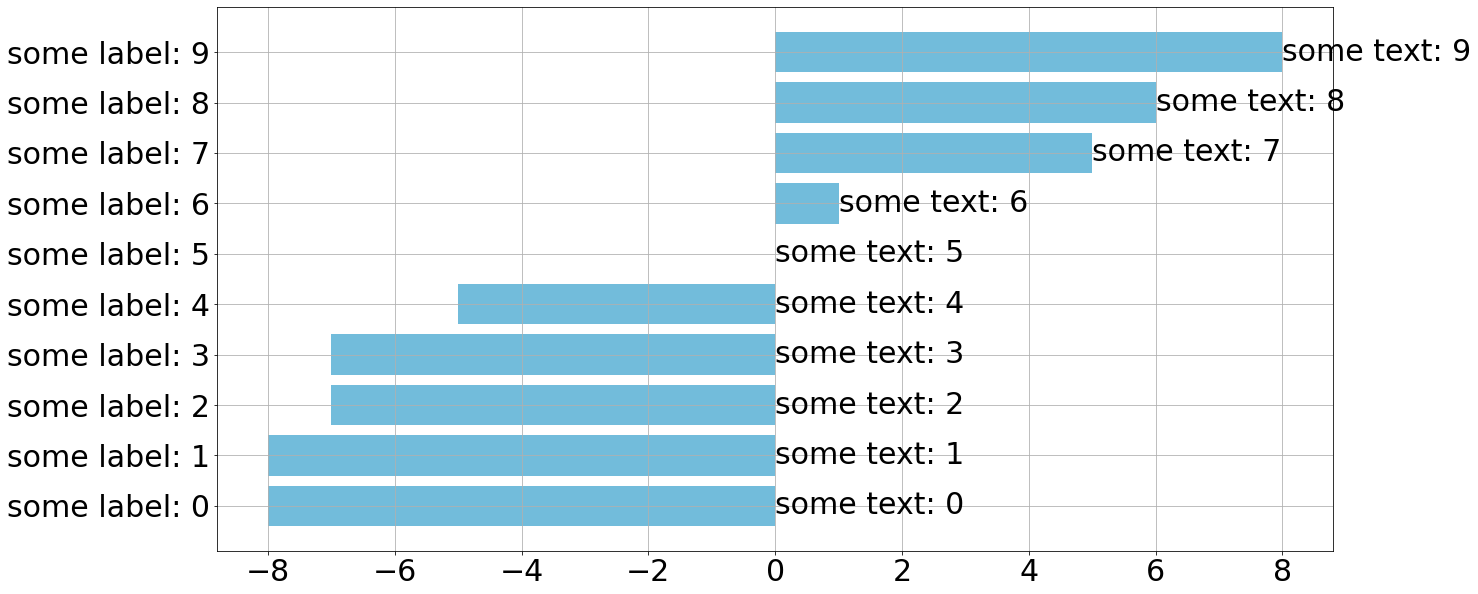

In [3]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [4]:
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    start_line = 0
    columns = probabilities_in_time.columns
    for column in columns:
        next_line = start_line + probabilities_in_time[column]
        plt.fill_between(probabilities_in_time.index,
                         start_line,
                         next_line,
                         cmap='RdBu',
                         label='Probability: ' + str(column))
        start_line = next_line
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid(axis='x')   
    plt.legend(prop={'size': 15},
               loc='lower left')
    plt.show()

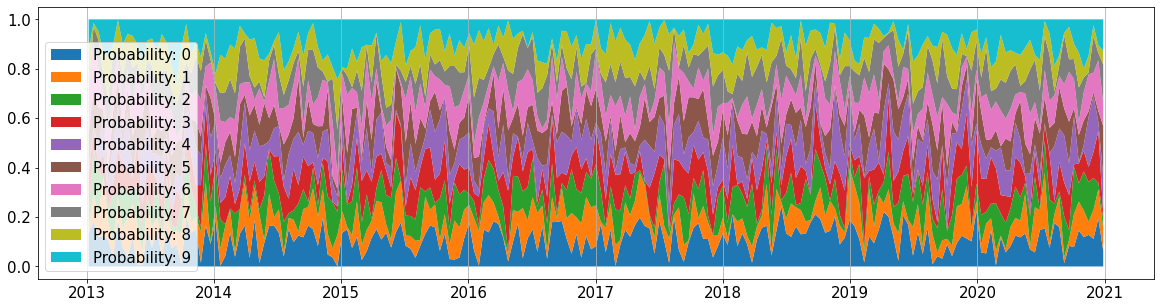

In [5]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [6]:
def plot_intraday_ts(intraday_ts, figsize):
    f = plt.figure(figsize=figsize)
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()

    df = pd.DataFrame(intraday_ts)
    df = df.fillna(df.mean())
    df['date'] = df.index.date
    df['time'] = df.index.time
    pivot = df.pivot_table(index=['time'], columns='date', values=0, aggfunc='mean')
    c = ax.pcolor(pivot, cmap='RdBu', edgecolors='white', linewidth=2)
    
    xlabels = list(pd.date_range(df.date.min(), df.date.max()).strftime('%B %d'))
    ylabels = list(pd.date_range(str(df.time.min()), str(df.time.max()), freq='1H').strftime('%H:%M'))
    ax.set_xticks(range(1, len(xlabels), 2))
    ax.set_xticklabels(xlabels[1::2], fontsize=10, rotation=45)
    ax.set_xlabel('Дата', fontsize=15)
    ax.set_yticks(range(1, len(ylabels), 2))
    ax.set_yticklabels(ylabels[1::2], fontsize=10)
    ax.set_ylabel('Время', fontsize=15)
    
    f.colorbar(c, ax=[ax], location='left', pad=0.04)
    plt.show()

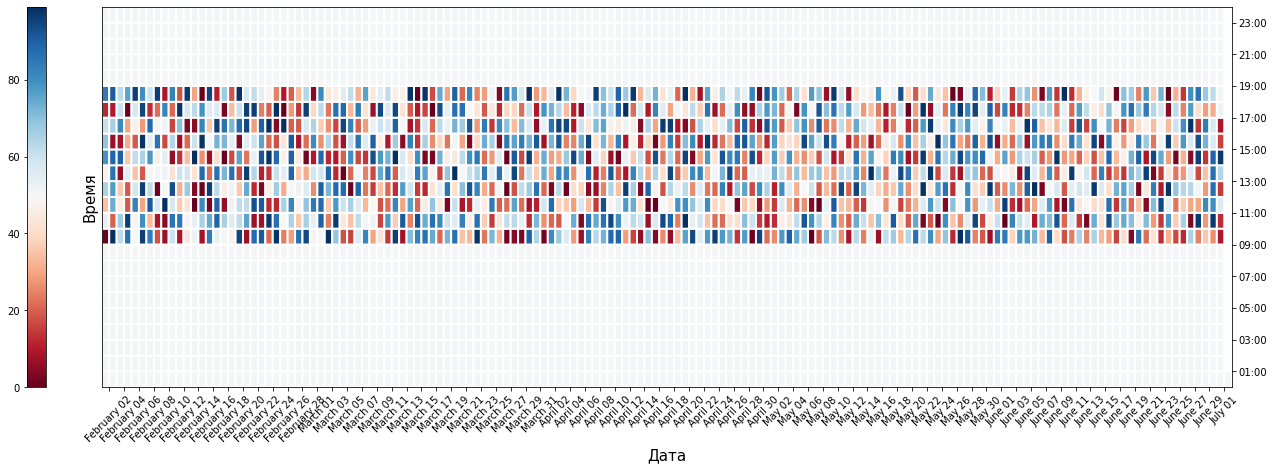

In [7]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)